In [2]:
import keras
from keras.layers import Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Model
from keras.layers import Input
from keras.layers import BatchNormalization
from keras.layers import UpSampling2D
from keras.layers import Concatenate
from keras import backend as K
from keras.layers import Lambda 


In [3]:
import scipy.io as scio
import numpy as np    
import os
import matplotlib.pyplot as plt
from scipy.misc import imsave
from scipy import ndimage, misc
from numpy import unravel_index

In [3]:
images = []
for root, dirnames, filenames in os.walk("Dataset/Train_images/"):
    for filename in filenames:
        filepath = os.path.join(root, filename)
        image = ndimage.imread(filepath, mode="L")
        images.append(image)

In [4]:
print (len(image))


496


In [5]:
labels = np.load('train_labels.npy')
labels_list = []
for i in range(len(labels)):
    labels_list.append(labels[i])

In [6]:
print (len(labels_list))
print (type(labels_list[0]))


images=np.array(images)
print(images.shape[0])
images = images.reshape(images.shape[0],496,64,1)

print(images[0].shape)
train_labels=labels_list[0:500]
train_images=images[0:500]
test_labels = labels_list[500:770]
test_images = images[500:770]

770
<type 'numpy.ndarray'>
770
(496, 64, 1)


In [7]:
print (len(train_images))
print (len(train_labels))
print (np.array(train_labels).shape)

500
500
(500, 496, 64, 8)


In [11]:
#x = np.array([[1,2],[3,4]])
x = np.ndarray(shape=(2,2,2),)
temp = np.zeros((2,2,2))
temp[0][0][0] = 1
temp[0][0][1] = 2
temp[0][1][0] = 3
temp[0][1][1] = 4
temp[1][0][0] = 1
temp[1][0][1] = 2
temp[1][1][0] = 1
temp[1][1][1] = 9
print (unravel_index(temp.argmax(),temp.shape))
print (x.shape)

(1, 1, 1)
(2, 2, 2)


In [12]:
print(temp.shape)
temp = np.expand_dims(temp,axis = 0)
print(temp.shape)

(2, 2, 2)
(1, 2, 2, 2)


In [48]:
pooling_indices1 = np.array([])
pooling_indices2 = np.array([])
pooling_indices3 = np.array([])


In [53]:
def Pooling_layer1(x) :
    matrix = x[0]
    rows = matrix.shape[0]
    cols = matrix.shape[1]
    depth = matrix.shape[2]
    pooled_mat1 = np.zeros((int(rows/2),int(cols/2),depth))
    pooled_indices1 = np.zeros((int(rows/2),int(cols/2),int(depth),2))
   # print (pooled_mat.shape)
    for i in range(depth):
        for j in range(rows/2):
            for k in range(cols/2):
                temp = np.zeros((2,2))
                temp[0][0] = matrix[j*2][k*2][i]
                temp[0][1] = matrix[j*2][k*2+1][i]
                temp[1][0] = matrix[j*2+1][k*2][i]
                temp[1][1] = matrix[j*2+1][k*2+1][i]
                index = unravel_index(temp.argmax(),temp.shape)
                pooled_mat1[j][k][i] = temp.max()
                pooled_indices1[j][k][i][0] = index[0]
                pooled_indices1[j][k][i][1] = index[1]
    return (np.expand_dims(pooled_mat1,axis=0))
    

#output = Pooling_layer1(temp)
#print (output[0])


In [ ]:
def Pooling_layer2(x) :
    matrix = x[0]
    rows = matrix.shape[0]
    cols = matrix.shape[1]
    depth = matrix.shape[2]
    pooled_mat2 = np.zeros((rows/2,cols/2,depth))
    pooled_indices2 = np.zeros((rows/2,cols/2,depth,2))
   # print (pooled_mat.shape)
    for i in range(depth):
        for j in range(rows/2):
            for k in range(cols/2):
                temp = np.zeros((2,2))
                temp[0][0] = matrix[j*2][k*2][i]
                temp[0][1] = matrix[j*2][k*2+1][i]
                temp[1][0] = matrix[j*2+1][k*2][i]
                temp[1][1] = matrix[j*2+1][k*2+1][i]
                index = unravel_index(temp.argmax(),temp.shape)
                pooled_mat2[j][k][i] = temp.max()
                pooled_indices2[j][k][i][0] = index[0]
                pooled_indices2[j][k][i][1] = index[1]
    return (np.expand_dims(pooled_mat2,axis=0))
    

#output = Pooling_layer1(temp)
#print (output[0])


In [ ]:
def Pooling_layer3(x) :
    matrix = x[0]
    rows = matrix.shape[0]
    cols = matrix.shape[1]
    depth = matrix.shape[2]
    pooled_mat3 = np.zeros((rows/2,cols/2,depth))
    pooled_indices3 = np.zeros((rows/2,cols/2,depth,2))
   # print (pooled_mat.shape)
    for i in range(depth):
        for j in range(rows/2):
            for k in range(cols/2):
                temp = np.zeros((2,2))
                temp[0][0] = matrix[j*2][k*2][i]
                temp[0][1] = matrix[j*2][k*2+1][i]
                temp[1][0] = matrix[j*2+1][k*2][i]
                temp[1][1] = matrix[j*2+1][k*2+1][i]
                index = unravel_index(temp.argmax(),temp.shape)
                pooled_mat3[j][k][i] = temp.max()
                pooled_indices3[j][k][i][0] = index[0]
                pooled_indices3[j][k][i][1] = index[1]
    return (np.expand_dims(pooled_mat3,axis=0))
    

#output = Pooling_layer1(temp)
#print (output[0])


In [36]:
def Pooling_output_shape_1(x):
    shape = list(x.shape)
    shape[2] = (shape[2])/2
    shape[1] = (shape[1])/2
    return tuple(shape)

def Pooling_output_shape_2(x):
    shape = list(x.shape)
    shape[2] = (shape[2])/2
    shape[1] = (shape[1])/2
    return tuple(shape)

def Pooling_output_shape_3(x):
    shape = list(x.shape)
    shape[2] = (shape[2])/2
    shape[1] = (shape[1])/2
    return tuple(shape)

In [35]:
pooling_indices = np.zeros((2,2,1,2))
pooling_indices[0][0][0][0] = 0
pooling_indices[0][0][0][1] = 0
pooling_indices[0][1][0][0] = 1
pooling_indices[0][1][0][1] = 1
pooling_indices[1][0][0][0] = 1
pooling_indices[1][0][0][1] = 1
pooling_indices[1][1][0][0] = 0
pooling_indices[1][1][0][1] = 1

In [40]:
def Unpooling_layer1(x):
    matrix = np.squeeze(x,axis = 0)
    shape = (x.shape)
    unpooled_mat1 = np.zeros((shape[0],shape[1]*2,shape[2]*2,shape[3]))
    for i in range(shape[3]):
        for j in range(shape[1]):
            for k in range(shape[2]):
                x_index = j*2+pooling_indices[j][k][i][0]
                y_index = k*2+pooling_indices[j][k][i][1]
                unpooled_mat1[0][x_index][y_index][i] = matrix[j][k][i]
    return unpooled_mat1
    

In [ ]:
def Unpooling_layer2(x):
    matrix = np.squeeze(x,axis = 0)
    shape = (x.shape)
    unpooled_mat2 = np.zeros((shape[0],shape[1]*2,shape[2]*2,shape[3]))
    for i in range(shape[3]):
        for j in range(shape[1]):
            for k in range(shape[2]):
                x_index = j*2+pooling_indices[j][k][i][0]
                y_index = k*2+pooling_indices[j][k][i][1]
                unpooled_mat2[0][x_index][y_index][i] = matrix[j][k][i]
    return unpooled_mat2
    

In [ ]:
def Unpooling_layer3(x):
    matrix = np.squeeze(x,axis = 0)
    shape = (x.shape)
    unpooled_mat3 = np.zeros((shape[0],shape[1]*2,shape[2]*2,shape[3]))
    for i in range(shape[3]):
        for j in range(shape[1]):
            for k in range(shape[2]):
                x_index = j*2+pooling_indices[j][k][i][0]
                y_index = k*2+pooling_indices[j][k][i][1]
                unpooled_mat3[0][x_index][y_index][i] = matrix[j][k][i]
    return unpooled_mat3
    

In [41]:
def Unpooling_output_shape1(x):
    shape = (x.shape)
    shape[2] = shape[2]*2
    shape[1] = shape[1]*2
    return tuple(shape)

def Unpooling_output_shape2(x):
    shape = (x.shape)
    shape[2] = shape[2]*2
    shape[1] = shape[1]*2
    return tuple(shape)

def Unpooling_output_shape3(x):
    shape = (x.shape)
    shape[2] = shape[2]*2
    shape[1] = shape[1]*2
    return tuple(shape)

In [42]:
sample = np.zeros((2,2,1))
sample[0][0][0] = 7
sample[0][1][0] = 7
sample[1][0][0] = 10
sample[1][1][0] = 6

print(sample.shape)
sol = Unpooling_layer1(np.expand_dims(sample,axis=0))
print(np.squeeze(sol,axis = 0))

(2, 2, 1)
[[[  7.]
  [  0.]
  [  0.]
  [  0.]]

 [[  0.]
  [  0.]
  [  0.]
  [  7.]]

 [[  0.]
  [  0.]
  [  0.]
  [  6.]]

 [[  0.]
  [ 10.]
  [  0.]
  [  0.]]]


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  # Remove the CWD from sys.path while we load stuff.


In [54]:
# Defines the input tensor
inputs = Input(shape=(496,None,1))

L1 = Conv2D(64,kernel_size=(7,3),activation = 'relu',padding = "same")(inputs)
L2 = BatchNormalization()(L1)
L3 = Lambda(Pooling_layer1,output_shape = Pooling_output_shape_1)(L2)
#L3 = MaxPooling2D(pool_size=(2,2))(L2)
L4 = Conv2D(64,kernel_size=(7,3),activation = 'relu',padding = "same")(L3)
L5 = BatchNormalization()(L4)
L6 = MaxPooling2D(pool_size=(2,2))(L5)
L7 = Conv2D(64,kernel_size=(7,3),activation = 'relu',padding = "same")(L6)
L8 = BatchNormalization()(L7)
L9 = MaxPooling2D(pool_size=(2,2))(L8)
L10 = Conv2D(64,kernel_size=(7,3),activation = 'relu',padding = "same")(L9)
L11 = BatchNormalization()(L10)
L12 = UpSampling2D(size = (2,2))(L11)
L13 = Concatenate(axis = 3)([L8,L12])
L14 = Conv2D(64,kernel_size=(7,3),activation = 'relu',padding = "same")(L13)
L15 = BatchNormalization()(L14)
L16 = UpSampling2D(size= (2,2))(L15)
L17 = Concatenate(axis = 3)([L16,L5])
L18 = Conv2D(64,kernel_size=(7,3),activation = 'relu',padding = "same")(L17)
L19 = BatchNormalization()(L18)
L20 = UpSampling2D(size=(2,2))(L19)
L21 = Concatenate(axis=3)([L20,L2])
L22 = Conv2D(64,kernel_size=(7,3),activation = 'relu',padding = "same")(L21)
L23 = BatchNormalization()(L22)
L24 = Conv2D(8,kernel_size=(1,1),activation = 'softmax',padding = "same")(L23)

model = Model(inputs = inputs, outputs = L24)
model.summary()

TypeError: __int__ returned non-int (type NoneType)

In [9]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [10]:
train_images_2=np.array(images)
train_labels_2=np.array(labels_list)
model.fit(train_images_2,train_labels_2,batch_size=8,epochs=10,validation_split = 0.33)

Train on 515 samples, validate on 255 samples
Epoch 1/10
515/515 [==============================] - 1375s - loss: 1.4785 - acc: 0.7307 - val_loss: 1.8171 - val_acc: 0.8342
Epoch 2/10
515/515 [==============================] - 1358s - loss: 0.9489 - acc: 0.7920 - val_loss: 1.1931 - val_acc: 0.7953
Epoch 3/10
515/515 [==============================] - 1431s - loss: 0.7919 - acc: 0.8005 - val_loss: 1.2294 - val_acc: 0.7746
Epoch 4/10
515/515 [==============================] - 1372s - loss: 0.7093 - acc: 0.8020 - val_loss: 0.6476 - val_acc: 0.8346
Epoch 5/10
515/515 [==============================] - 1476s - loss: 0.6552 - acc: 0.8054 - val_loss: 0.6271 - val_acc: 0.8318
Epoch 6/10
515/515 [==============================] - 1647s - loss: 0.7162 - acc: 0.8035 - val_loss: 0.6038 - val_acc: 0.8344
Epoch 7/10
515/515 [==============================] - 1455s - loss: 0.6374 - acc: 0.8073 - val_loss: 0.5707 - val_acc: 0.8348
Epoch 8/10
515/515 [==============================] - 1467s - loss: 0.63

In [11]:
model.save_weights("weights.h5")

In [55]:
testing_image = ndimage.imread('Dataset/testing_image_4.png',mode = 'L')

In [56]:
testing_image = np.array(testing_image)
print(testing_image.shape[0])

496


In [57]:
testing_image = testing_image.reshape(1,496,64,1)

In [58]:
prediction = model.predict(testing_image)

In [59]:
print(prediction.shape)

(1, 496, 64, 8)


In [60]:
prediction = np.squeeze(prediction,axis = 0)

In [61]:
print(prediction.shape)


(496, 64, 8)


In [62]:
print (prediction)

[[[  9.90431845e-01   5.23849914e-04   2.38480396e-03 ...,   3.14290333e-03
     7.15359987e-04   9.47752633e-05]
  [  9.95876908e-01   1.26564744e-04   5.17529435e-04 ...,   2.05338211e-03
     3.22114036e-04   4.62890821e-05]
  [  9.91709769e-01   3.47106252e-04   1.40436867e-03 ...,   3.52300471e-03
     4.66498459e-04   1.45449289e-04]
  ..., 
  [  9.93215978e-01   2.89540971e-04   1.14223047e-03 ...,   2.86238850e-03
     4.15960822e-04   1.21896235e-04]
  [  9.94165242e-01   1.88748279e-04   9.98849748e-04 ...,   2.88870698e-03
     5.12290921e-04   5.69161930e-05]
  [  9.77184176e-01   1.62097695e-03   5.97098330e-03 ...,   8.09637923e-03
     1.31334132e-03   5.07012708e-04]]

 [[  9.90255058e-01   3.38861166e-04   1.74046448e-03 ...,   4.34618024e-03
     1.35297398e-03   1.18468612e-04]
  [  9.95023370e-01   1.01163852e-04   3.01213498e-04 ...,   2.36597634e-03
     9.77306976e-04   7.58161477e-05]
  [  9.88762558e-01   4.33083362e-04   1.21312588e-03 ...,   5.10587031e-03
  

In [63]:
print(prediction[260][45])

[ 0.18668322  0.02075981  0.07049716  0.08813264  0.0905104   0.37279558
  0.11087015  0.059751  ]


In [64]:
s = [1,2,3,4]
print(np.argmax(s))

3


In [65]:
print(prediction.shape)

(496, 64, 8)


In [66]:
output = np.zeros((496,64))

In [67]:
for i in range(496):
    for j in range(64):
        index = np.argmax(prediction[i][j])
        output[i][j] = index

In [68]:
print (output.shape)

(496, 64)


In [69]:
color= np.zeros((496,64,3))

In [70]:
for j in range(496):
    for k in range(64):
        if(output[j][k]==0):
            color[j][k] = [0,0,0]
        if(output[j][k]==1):
            color[j][k] = [128,0,0]
        if(output[j][k]==2):
            color[j][k] = [0,128,0]
        if(output[j][k]==3):
            color[j][k] = [128,128,0] 
        if(output[j][k]==4):
            color[j][k] = [0,128,128]
        if(output[j][k]==5):
            color[j][k] = [64,0,0]
        if(output[j][k]==6):
            color[j][k] = [192,0,0]
        if(output[j][k]==7):
            color[j][k] = [64,128,0]

In [71]:
plt.imshow(color)

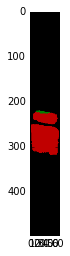

In [72]:
plt.show()